# Imports


In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kendalltau

from infant_connectivity import get_demo_data

# Global variables and configuration

In [3]:
palette = sns.color_palette(["green", "orange", "red"])

#con_path = Path("/Volumes/usc_data/ElementSE/eegip/con_paper/")
con_path = Path("/Users/christian/Documents/con_paper/")

plt.rcParams['figure.facecolor'] = 'white'

# Loading data

In [4]:
demo_data = get_demo_data(force_download=False)

# Looking at ADOS information

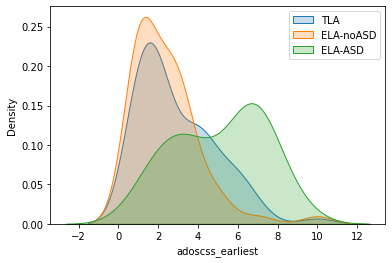

In [5]:
demo_data.group = demo_data.group.str.replace("Control", "TLA").str.replace("HRA", "ELA")
for group in ["TLA", "ELA-noASD", "ELA-ASD"]:
    sns.kdeplot(demo_data[demo_data.group == group]["adoscss_earliest"], fill=True, label=group)
plt.legend();

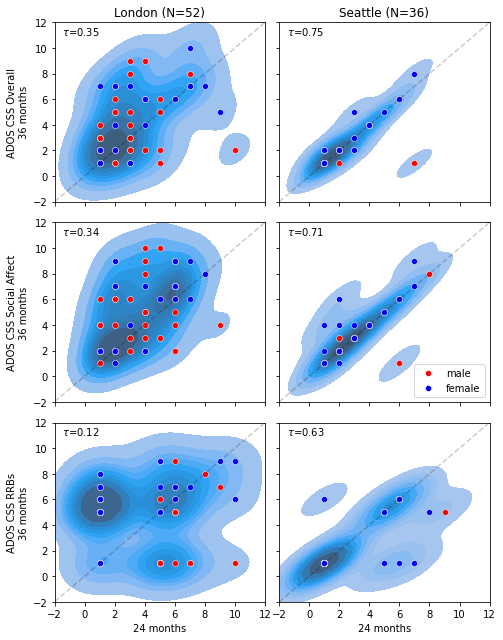

In [6]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(7, 9))
for ax_col, site, title in zip(axes.T, ["london", "washington"], ["London", "Seattle"]):
     for ax, dimension, dimension_str in zip(ax_col, ['adoscss', 'ados_sacss', 'ados_rrbcss'], ["Overall", "Social Affect", "RRBs"]):
        x, y = demo_data[demo_data.dataset == site][[f"{dimension}_24m", f"{dimension}_36m"]].dropna(how="any").values.T
        sns.kdeplot(x=x, y=y, fill=True, ax=ax)

        label = dimension == "ados_sacss" and site == "washington"         
        m_x, m_y = demo_data[(demo_data.dataset == site) & (demo_data.sex == "F")][[f"{dimension}_24m", f"{dimension}_36m"]].dropna(how="any").values.T
        f_x, f_y = demo_data[(demo_data.dataset == site) & (demo_data.sex == "M")][[f"{dimension}_24m", f"{dimension}_36m"]].dropna(how="any").values.T
        sns.scatterplot(x=m_x, y=m_y, color="r", ax=ax, label="male" if label else None)
        sns.scatterplot(x=f_x, y=f_y, color="b", ax=ax, label="female" if label else None)
        ax.plot([-2, 12], [-2, 12], linestyle="dashed", color="k", alpha=0.2)
        ax.set_xlim(-2, 12)
        ax.set_ylim(-2, 12)
        ax.set_xlabel(f"24 months")
        ax.set_ylabel(f"ADOS CSS {dimension_str}\n36 months")

        if dimension == "adoscss":
            ax.set_title(title + f" (N={len(m_x) + len(f_x)})")
            
        if label:
            ax.legend(loc="lower right")            
        
        ax.text(-1.5, 11, fr"$\tau$={kendalltau(list(m_x) + list(f_x), list(m_y) + list(f_y))[0]:.2}")

fig.tight_layout()
fig.savefig("images/" + "ados-test-retest.png", dpi=300)

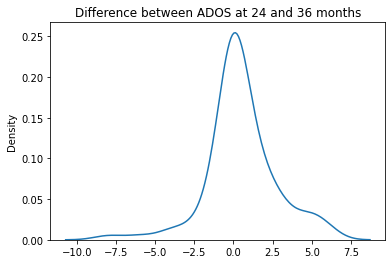

In [7]:
sns.kdeplot(np.diff(demo_data[["adoscss_24m", "adoscss_36m"]].dropna(how="any").values).ravel())
plt.title("Difference between ADOS at 24 and 36 months");

In [11]:
demo_data[demo_data.dataset == "london"][[f"{dimension}_24m", f"{dimension}_36m"]].dropna(how="any").shape[0]

52

In [12]:
demo_data[demo_data.dataset == "washington"][[f"{dimension}_24m", f"{dimension}_36m"]].dropna(how="any").shape[0]

36